In [1]:
!uv pip install numpy 

Using Python 3.11.9 environment at: 
Audited 1 package in 69ms


In [ ]:
import os
import json
from PIL import Image
import numpy as np

def load_all_datasets(base_path):
    image_data = []
    labels = []

    for folder in os.listdir(base_path):
        subfolder_path = os.path.join(base_path, folder)
        if not os.path.isdir(subfolder_path):
            continue  # Nur Ordner verarbeiten

        image_dir = os.path.join(subfolder_path, "img")
        label_dir = os.path.join(subfolder_path, "ann")

        if not os.path.exists(image_dir) or not os.path.exists(label_dir):
            print(f"⚠️ Überspringe {folder} (img oder ann fehlt)")
            continue

        for filename in os.listdir(image_dir):
            if filename.endswith(".png"):
                img_path = os.path.join(image_dir, filename)
                label_path = os.path.join(label_dir, filename + ".json")

                if not os.path.exists(label_path):
                    print(f"❌ Kein JSON für: {img_path}")
                    continue

                try:
                    image = Image.open(img_path).convert("RGB")
                    image = image.resize((224, 224))  # Für CNNs
                    image_data.append(np.array(image))

                    with open(label_path, "r") as f:
                        label_json = json.load(f)
                        labels.append(label_json)
                except Exception as e:
                    print(f"⚠️ Fehler bei {img_path}: {e}")

    print(f"✅ Insgesamt geladen: {len(image_data)} Bilder mit Labels")
    return np.array(image_data), labels


In [ ]:
dataset_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\fsoco_bounding_boxes_train"
images, labels = load_all_datasets(dataset_path)



In [ ]:
print(f"Anzahl Bilder: {len(images)}")
print(f"Anzahl Labels: {len(labels)}")

# Beispielbild anzeigen
from matplotlib import pyplot as plt
for i in range(5):

 plt.imshow(images[i])
 plt.title("Beispielbild")
 plt.show()

# Label ausgeben
 print("Beispiel-Label:", labels[i])


In [2]:
!uv pip install opencv-python


Using Python 3.11.9 environment at: 
Audited 1 package in 24ms


In [4]:
import cv2
import os
import numpy as np

img_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\fsoco_bounding_boxes_train\aristurtle\img\amz_02450.png"
print("Pfad existiert:", os.path.exists(img_path))

# Workaround: Bilddatei binär lesen und in OpenCV decodieren
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# Anzeige im Fenster
if image is None:
    print("❌ Bild konnte nicht geladen werden.")
else:
    image = cv2.resize(image, (800, 600))  # (Breite, Höhe)
    cv2.imshow("Bild-BGR", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Pfad existiert: True


In [7]:
import cv2
import numpy as np

# Bild robust laden (mit Umlauten umgehen)
img_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\fsoco_bounding_boxes_train\aristurtle\img\amz_02450.png"
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# HSV umwandeln
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Fenster mit Trackbars
cv2.namedWindow("HSV-Filter")

def nothing(x):
    pass

# Trackbars: Hue, Saturation, Value (Min & Max)
cv2.createTrackbar("Hue Min", "HSV-Filter", 0, 179, nothing)
cv2.createTrackbar("Hue Max", "HSV-Filter", 25, 179, nothing)
cv2.createTrackbar("Sat Min", "HSV-Filter", 100, 255, nothing)
cv2.createTrackbar("Sat Max", "HSV-Filter", 255, 255, nothing)
cv2.createTrackbar("Val Min", "HSV-Filter", 100, 255, nothing)
cv2.createTrackbar("Val Max", "HSV-Filter", 255, 255, nothing)

print("🎛️ HSV-Filter läuft. ESC zum Beenden.")

while True:
    # Trackbar-Werte lesen
    h_min = cv2.getTrackbarPos("Hue Min", "HSV-Filter")
    h_max = cv2.getTrackbarPos("Hue Max", "HSV-Filter")
    s_min = cv2.getTrackbarPos("Sat Min", "HSV-Filter")
    s_max = cv2.getTrackbarPos("Sat Max", "HSV-Filter")
    v_min = cv2.getTrackbarPos("Val Min", "HSV-Filter")
    v_max = cv2.getTrackbarPos("Val Max", "HSV-Filter")

    # Maske und Filter anwenden
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(image_hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Skalieren (z. B. 50 %)
    scale = 0.3
    mask_small = cv2.resize(mask, (0, 0), fx=scale, fy=scale)
    result_small = cv2.resize(result, (0, 0), fx=scale, fy=scale)

    # Anzeigen
    cv2.imshow("Maske", mask_small)
    cv2.imshow("Gefiltert (HSV)", result_small)

    # ESC zum Beenden
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()


🎛️ HSV-Filter läuft. ESC zum Beenden.


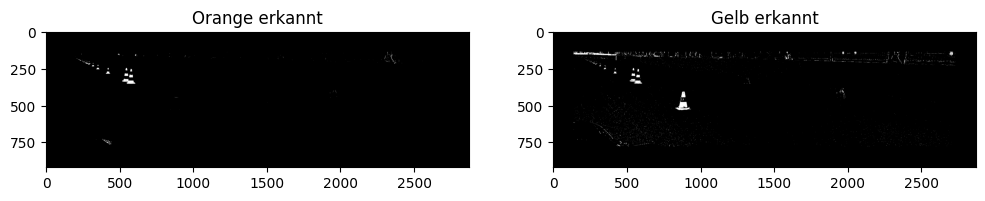

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Farbgrenzen definieren (angepasst – kann man optimieren!)
orange_lower = np.array([0, 90, 45])
orange_upper = np.array([18, 255, 255])

yellow_lower = np.array([7, 100, 100])
yellow_upper = np.array([100, 255, 255])

# Maske für Orange & Gelb
mask_orange = cv2.inRange(image_hsv, orange_lower, orange_upper)
mask_yellow = cv2.inRange(image_hsv, yellow_lower, yellow_upper)

# Anzeigen
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange erkannt")

plt.subplot(1, 2, 2)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Gelb erkannt")
plt.show()


# BGR in LAB
## Orange - A hoch und B mittel
## Geld - A niedrig und B seh hoch

In [35]:
import cv2
import numpy as np

# --- Bild laden (wie immer robust per imdecode)
img_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\fsoco_bounding_boxes_train\aristurtle\img\amz_02450.png"
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# --- In LAB konvertieren
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# --- Trackbar-Fenster
cv2.namedWindow("LAB-Filter")

def nothing(x):
    pass

# Trackbars für L, A, B (jeweils min und max)
cv2.createTrackbar("L Min", "LAB-Filter", 0, 255, nothing)
cv2.createTrackbar("L Max", "LAB-Filter", 255, 255, nothing)
cv2.createTrackbar("A Min", "LAB-Filter", 120, 255, nothing)
cv2.createTrackbar("A Max", "LAB-Filter", 140, 255, nothing)
cv2.createTrackbar("B Min", "LAB-Filter", 140, 255, nothing)
cv2.createTrackbar("B Max", "LAB-Filter", 200, 255, nothing)

print("🎛️ Justiere A und B, um Farben wie Orange oder Gelb zu isolieren (LAB).\nESC zum Beenden.")

while True:
    # Werte lesen
    l_min = cv2.getTrackbarPos("L Min", "LAB-Filter")
    l_max = cv2.getTrackbarPos("L Max", "LAB-Filter")
    a_min = cv2.getTrackbarPos("A Min", "LAB-Filter")
    a_max = cv2.getTrackbarPos("A Max", "LAB-Filter")
    b_min = cv2.getTrackbarPos("B Min", "LAB-Filter")
    b_max = cv2.getTrackbarPos("B Max", "LAB-Filter")

    # Maske erzeugen
    lower = np.array([l_min, a_min, b_min])
    upper = np.array([l_max, a_max, b_max])
    mask = cv2.inRange(image_lab, lower, upper)

    # Anwenden
    result = cv2.bitwise_and(image, image, mask=mask)
    # Skalieren (z. B. 30 %)
    scale = 0.3
    mask_small = cv2.resize(mask, (0, 0), fx=scale, fy=scale)
    result_small = cv2.resize(result, (0, 0), fx=scale, fy=scale)

    cv2.imshow("Maske", mask_small)
    cv2.imshow("Gefiltert (LAB)", result_small)


    key = cv2.waitKey(1)
    if key == 27:  # ESC
        break

cv2.destroyAllWindows()


🎛️ Justiere A und B, um Farben wie Orange oder Gelb zu isolieren (LAB).
ESC zum Beenden.


## LAB_Schwellwerte

In [51]:
import cv2
import numpy as np

# --- Bild laden
img_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\gfr_00871.jpg"
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# --- In LAB konvertieren
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# --- Fenster + Trackbars
cv2.namedWindow("LAB-Filter")

def nothing(x):
    pass

# Trackbars erstellen
cv2.createTrackbar("L Min", "LAB-Filter", 0, 255, nothing)
cv2.createTrackbar("L Max", "LAB-Filter", 255, 255, nothing)
cv2.createTrackbar("A Min", "LAB-Filter", 120, 255, nothing)
cv2.createTrackbar("A Max", "LAB-Filter", 140, 255, nothing)
cv2.createTrackbar("B Min", "LAB-Filter", 140, 255, nothing)
cv2.createTrackbar("B Max", "LAB-Filter", 200, 255, nothing)

print("🎛️ Justiere die Regler oder drücke:\n  [o] für Orange\n  [y] für Gelb\n  [b] für Blau\n  [ESC] zum Beenden.")

while True:
    # Aktuelle Trackbar-Werte lesen
    l_min = cv2.getTrackbarPos("L Min", "LAB-Filter")
    l_max = cv2.getTrackbarPos("L Max", "LAB-Filter")
    a_min = cv2.getTrackbarPos("A Min", "LAB-Filter")
    a_max = cv2.getTrackbarPos("A Max", "LAB-Filter")
    b_min = cv2.getTrackbarPos("B Min", "LAB-Filter")
    b_max = cv2.getTrackbarPos("B Max", "LAB-Filter")

    # Maske und Ergebnis erzeugen
    lower = np.array([l_min, a_min, b_min])
    upper = np.array([l_max, a_max, b_max])
    mask = cv2.inRange(image_lab, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Anzeigen (skaliert)
    scale = 0.3
    mask_small = cv2.resize(mask, (0, 0), fx=scale, fy=scale)
    result_small = cv2.resize(result, (0, 0), fx=scale, fy=scale)

    cv2.imshow("Maske", mask_small)
    cv2.imshow("Gefiltert (LAB)", result_small)

    key = cv2.waitKey(1) & 0xFF

    if key == 27:  # ESC
        break
    elif key == ord('o'):
        # Orange Preset
        cv2.setTrackbarPos("L Min", "LAB-Filter", 20)
        cv2.setTrackbarPos("L Max", "LAB-Filter", 230)
        cv2.setTrackbarPos("A Min", "LAB-Filter", 140)
        cv2.setTrackbarPos("A Max", "LAB-Filter", 170)
        cv2.setTrackbarPos("B Min", "LAB-Filter", 140)
        cv2.setTrackbarPos("B Max", "LAB-Filter", 180)
        print("🟠 Orange Preset geladen.")
    elif key == ord('y'):
        # Gelb Preset
        cv2.setTrackbarPos("L Min", "LAB-Filter", 160)
        cv2.setTrackbarPos("L Max", "LAB-Filter", 255)
        cv2.setTrackbarPos("A Min", "LAB-Filter", 0)
        cv2.setTrackbarPos("A Max", "LAB-Filter", 140)
        cv2.setTrackbarPos("B Min", "LAB-Filter", 140)
        cv2.setTrackbarPos("B Max", "LAB-Filter", 225)
        print("🟡 Gelb Preset geladen.")
    elif key == ord('b'):
        # Blau Preset
        cv2.setTrackbarPos("L Min", "LAB-Filter", 0)
        cv2.setTrackbarPos("L Max", "LAB-Filter", 150)
        cv2.setTrackbarPos("A Min", "LAB-Filter", 130)
        cv2.setTrackbarPos("A Max", "LAB-Filter", 170)
        cv2.setTrackbarPos("B Min", "LAB-Filter", 180)
        cv2.setTrackbarPos("B Max", "LAB-Filter", 255)
        print("🔵 Blau Preset geladen.")

cv2.destroyAllWindows()


🎛️ Justiere die Regler oder drücke:
  [o] für Orange
  [y] für Gelb
  [b] für Blau
  [ESC] zum Beenden.


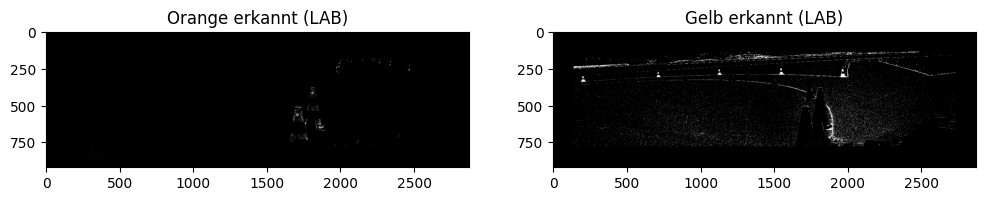

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild robust laden (z. B. per imdecode, falls nötig)
img_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\fsoco_bounding_boxes_train\aristurtle\img\amz_01962.png"
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# BGR → LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Farbgrenzen definieren (muss man je nach Bild feinjustieren)
# Werte basieren auf typischem LAB-Farbraum für Orange und Gelb:
# A-Kanal: -128 (grün) bis +127 (rot), B-Kanal: -128 (blau) bis +127 (gelb)

# Orange – etwas rötlicher
orange_lower = np.array([20, 140, 140])
orange_upper = np.array([230, 170, 180])

# Gelb – mehr gelb als rot
yellow_lower = np.array([160, 0, 140])
yellow_upper = np.array([255, 140, 225])

# Masken erzeugen
mask_orange = cv2.inRange(image_lab, orange_lower, orange_upper)
mask_yellow = cv2.inRange(image_lab, yellow_lower, yellow_upper)

# Anzeigen
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange erkannt (LAB)")

plt.subplot(1, 2, 2)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Gelb erkannt (LAB)")
plt.show()


## Test

In [11]:
import cv2
import os
import numpy as np

img_path = r"C:/Users/youse/OneDrive/Desktop/Hütchen/amz_00223.png"

# Workaround: Bilddatei binär lesen und in OpenCV decodieren
with open(img_path, 'rb') as f:
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# Anzeige im Fenster
if image is None:
    print("❌ Bild konnte nicht geladen werden.")
else:
    image = cv2.resize(image, (800, 600))  # (Breite, Höhe)
    cv2.imshow("Bild-BGR", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


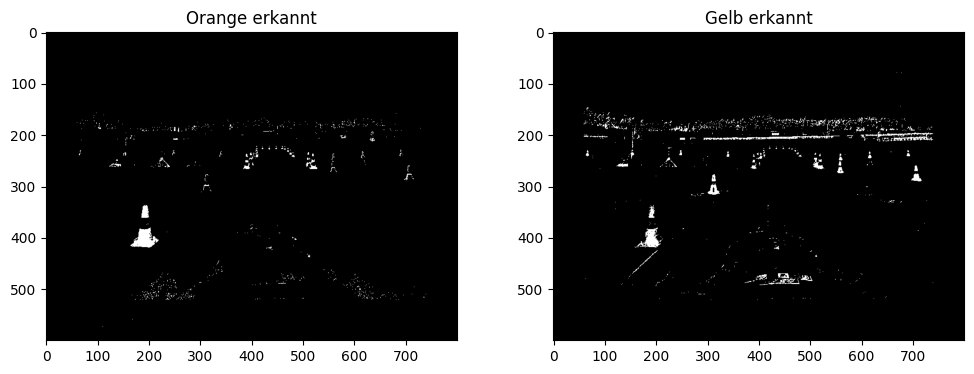

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Farbgrenzen definieren (angepasst – kann man optimieren!)
#orange_lower = np.array([0, 90, 45])
#orange_upper = np.array([18, 255, 255])
orange_lower = np.array([0, 90, 45])  # L irrelevant, a↑
orange_upper = np.array([25, 255, 255])

yellow_lower = np.array([7, 100, 100])
yellow_upper = np.array([100, 255, 255])
#yellow_lower = np.array([7, 135, 160])
#yellow_upper = np.array([100, 150, 200])

# Maske für Orange & Gelb
mask_orange = cv2.inRange(image_hsv, orange_lower, orange_upper)
mask_yellow = cv2.inRange(image_hsv, yellow_lower, yellow_upper)

# Anzeigen
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange erkannt")

plt.subplot(1, 2, 2)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Gelb erkannt")
plt.show()


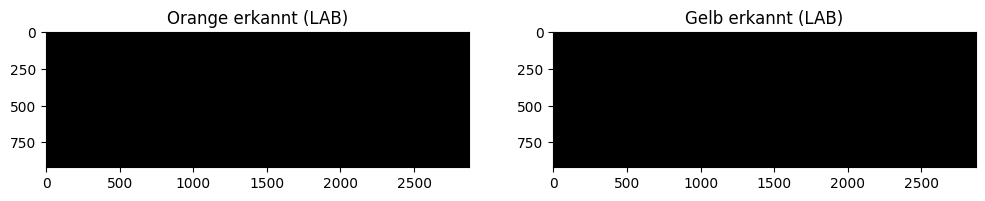

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# BGR → LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Farbgrenzen definieren (muss man je nach Bild feinjustieren)
# Werte basieren auf typischem LAB-Farbraum für Orange und Gelb:
# A-Kanal: -128 (grün) bis +127 (rot), B-Kanal: -128 (blau) bis +127 (gelb)

# Orange
orange_lower = np.array([0,  45,  40])   # L irrelevant, a>=45, b>=40
orange_upper = np.array([255, 70,  80])

# Gelb
yellow_lower = np.array([0,  20,  60])   # a>=20, b>=60
yellow_upper = np.array([255, 45,  100])


# Masken erzeugen
mask_orange = cv2.inRange(image_lab, orange_lower, orange_upper)
mask_yellow = cv2.inRange(image_lab, yellow_lower, yellow_upper)

# Anzeigen
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange erkannt (LAB)")

plt.subplot(1, 2, 2)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Gelb erkannt (LAB)")
plt.show()


## Lab_Video

In [40]:
import cv2
import numpy as np

# Videoquelle: Pfad zur Datei oder 0 für Webcam
video_path = r"C:\Users\youse\Downloads\Formula Student Germany Driverless Acceleration 3.34s.mp4"
cap = cv2.VideoCapture(video_path)

# Video speichern: Pfad + Format
output_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\output_masked_video.avi"

# Video-Parameter holen
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# VideoWriter initialisieren (für farbige Ausgaben mit Maske)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # BGR → LAB
    frame_lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)

    # Farbgrenzen
    orange_lower = np.array([20, 140, 140])
    orange_upper = np.array([230, 170, 180])
    yellow_lower = np.array([160, 0, 140])
    yellow_upper = np.array([255, 140, 225])

    # Masken
    mask_orange = cv2.inRange(frame_lab, orange_lower, orange_upper)
    mask_yellow = cv2.inRange(frame_lab, yellow_lower, yellow_upper)

    # Ergebnisse einfärben
    result_orange = cv2.bitwise_and(frame, frame, mask=mask_orange)
    result_yellow = cv2.bitwise_and(frame, frame, mask=mask_yellow)

    # Beide Maskenergebnisse zusammenführen
    combined_result = cv2.addWeighted(result_orange, 1, result_yellow, 1, 0)

    # Video schreiben (originale Größe)
    out.write(combined_result)

    # Vorschau in kleinerem Format (z. B. 50 %)
    preview = cv2.resize(combined_result, None, fx=0.5, fy=0.5)
    cv2.imshow("Erkannte Farben (Orange + Gelb)", preview)
    cv2.imshow("Original", frame_small)

    # Beenden mit 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Aufräumen
cap.release()
out.release()
cv2.destroyAllWindows()


## LAB und Blau 

In [50]:
import cv2
import numpy as np

# Videoquelle: Pfad zur Datei oder 0 für Webcam
video_path = r"C:\Users\youse\Downloads\Formula Student Germany Driverless Acceleration 3.34s.mp4"
cap = cv2.VideoCapture(video_path)

# Video speichern: Pfad + Format
output_path = r"C:\Users\youse\OneDrive\Desktop\Hütchen\output_masked_video.avi"

# Video-Parameter holen
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# VideoWriter initialisieren (für farbige Ausgaben mit Maske)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # BGR → LAB konvertieren
    frame_lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)

    # === Farbgrenzen definieren ===
    # Orange
    orange_lower = np.array([22, 140, 90])
    orange_upper = np.array([232, 255, 251])

    # Gelb
    yellow_lower = np.array([110, 0, 142])
    yellow_upper = np.array([255, 142, 225])

    # Blau (typische LAB-Werte – ggf. anpassen je nach Beleuchtung und Bild)
    blue_lower = np.array([0, 0, 0])
    blue_upper = np.array([255, 255, 114])

    # === Masken erstellen ===
    mask_orange = cv2.inRange(frame_lab, orange_lower, orange_upper)
    mask_yellow = cv2.inRange(frame_lab, yellow_lower, yellow_upper)
    mask_blue = cv2.inRange(frame_lab, blue_lower, blue_upper)

    # === Ergebnisse einfärben ===
    result_orange = cv2.bitwise_and(frame, frame, mask=mask_orange)
    result_yellow = cv2.bitwise_and(frame, frame, mask=mask_yellow)
    result_blue = cv2.bitwise_and(frame, frame, mask=mask_blue)

    # === Alle Farb-Ergebnisse zusammenführen ===
    combined_result = cv2.addWeighted(result_orange, 1, result_yellow, 1, 0)
    combined_result = cv2.addWeighted(combined_result, 1, result_blue, 1, 0)

    # === Video speichern ===
    out.write(combined_result)

    # === Vorschau anzeigen (skaliert) ===
    preview = cv2.resize(combined_result, None, fx=0.5, fy=0.5)
    original_small = cv2.resize(frame, None, fx=0.5, fy=0.5)

    cv2.imshow("Erkannte Farben (Orange + Gelb + Blau)", preview)
    cv2.imshow("Original", original_small)

    # Beenden mit Taste 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Aufräumen
cap.release()
out.release()
cv2.destroyAllWindows()
